In [4]:
import numpy as np;
import pandas as pd;


In [5]:
df=pd.read_csv("https://raw.githubusercontent.com/PRIYANG-BHATT/Datasets-Youtube-Pandas/main/DS/heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()  #3means no null value

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
print (df.duplicated().any());  ##contains duplicate otherwise false

True


In [10]:
df=df.drop_duplicates();   #duplictes removed
print (df.duplicated().any())


False


In [11]:
#seprate categorical and numerical volums to process them seprately 
nl=[];
cl=[];
for i in df.columns:
    if df[i].nunique() <= 10:
        cl.append(i)
    else:
        nl.append(i);

print ("categorival column :",cl)
print ("numercal column : ",nl)

categorival column : ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
numercal column :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [12]:
#encoding of categorical data
df['cp'].unique()  #cantain 4 distint values with is  representing characterstic

# binary vector has to be made as dummy variable
# 1 0 0 0 =0
# 0 1 0 0  =1
# 0 0 1 0  =2
# 0 0 0 1 =3
# drop firstcolumn of vector to remveOVE DUMMY VARIABLE TRAP


array([0, 1, 2, 3], dtype=int64)

In [13]:
#removing coulumn which are classifiers and alrdybinary
cl.remove('target')
cl.remove('sex')

In [14]:
print (cl)


['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [15]:
df=pd.get_dummies(df,columns=cl,drop_first=True) ##getting dummy vriale in all categorical coulmn using in built methord and renoving first column for dummy vriable trap

In [16]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [25]:
##fetures scaling in order for Machine learing algoritm(Linear Reg,nearestneighbour) to calculate distance between data
#scaling is important inorder to compare data
#feature scaling in our data only reqired for nl
from sklearn.preprocessing import StandardScaler
scal=StandardScaler();

In [26]:
df[nl]=scal.fit_transform(df[nl])

In [27]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [28]:
##split data in traning and testing part
X=df.drop('target',axis=1)
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [30]:
Y=df['target']

In [32]:
from sklearn.model_selection import train_test_split as tts

In [43]:
xtrain,xtest,ytrain,ytest=tts(X,Y,test_size=0.25,random_state=42)

In [44]:
ytest

245    1
349    0
135    0
389    1
66     1
      ..
23     1
438    1
60     1
377    1
140    0
Name: target, Length: 76, dtype: int64

In [48]:
#classification problem taget=0 nocancer,target =1 cancer
# run various classification algorithm on data

# 1.Logistic Regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression() #making instance of LR

In [49]:
LR.fit(xtrain,ytrain)  ##Givoing data to fit in LR

LogisticRegression()

In [77]:
ypred=LR.predict(xtest)  #variable to store predicted cancer for xtest random  variable

In [52]:
#to checkacuracy
from sklearn.mtrics import accuracy_score

In [87]:
r1=accuracy_score(ytest,ypred)
print (r1)

0.8289473684210527


In [56]:
## LinearRegression is 82.89473684210526% accurate


In [58]:
# 2. Support Vector Classifier
from sklearn import svm #support vector machine
svm=svm.SVC()

In [59]:
svm.fit(xtrain,ytrain)

SVC()

In [60]:
ypred2=svm.predict(xtest)

In [89]:
r2=accuracy_score(ytest,ypred2)
print (r2)

0.8157894736842105


In [62]:
# Support Vector Classifier is 81.578947368421055%  accurate


In [68]:
## using 3. kneighbourclassifier 
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(); #here  n_neighbors=5

In [69]:
knc.fit(xtrain,ytrain)

KNeighborsClassifier()

In [74]:
ypred3=knc.predict(xtest)

In [90]:
r3=accuracy_score(ytest,ypred3)
print (r3)

0.7763157894736842


In [76]:
# kneighbourclassifier  is 77.63157894736842 % accurate

In [83]:
#more use of kneighbour model usingvalue of neihbourchange
optiscore=[];
for i in range(1,40):
    knc2=KNeighborsClassifier(n_neighbors=i);
    knc2.fit(xtrain,ytrain)
    y_p=knc2.predict(xtest)
    optiscore+=[(accuracy_score(ytest,y_p))]

In [84]:
print (optiscore)

[0.7105263157894737, 0.7894736842105263, 0.7105263157894737, 0.7631578947368421, 0.7763157894736842, 0.7894736842105263, 0.7631578947368421, 0.7631578947368421, 0.7763157894736842, 0.7631578947368421, 0.7631578947368421, 0.7631578947368421, 0.75, 0.7631578947368421, 0.7631578947368421, 0.7894736842105263, 0.75, 0.7631578947368421, 0.75, 0.7631578947368421, 0.7368421052631579, 0.7368421052631579, 0.7236842105263158, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


In [94]:

df2=pd.read_csv("https://raw.githubusercontent.com/PRIYANG-BHATT/Datasets-Youtube-Pandas/main/DS/heart.csv")
df2.head()
## In non linear pre processing such as dummy variable or numdata vs features not required and scaling of data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [95]:
df2.duplicated().any()  ##duplicates exist

True

In [96]:
df2=df2.drop_duplicates()  ##removing duplicates
df2.duplicated().any()

False

In [97]:
x2=df2.drop('target',axis=1) ##independent random variable after removing result
y2=df2['target']   #dependent RV

In [99]:
x2train,x2test,y2train,y2test=tts(x2,y2,test_size=0.25,random_state=42)

In [100]:
y2test

245    1
349    0
135    0
389    1
66     1
      ..
23     1
438    1
60     1
377    1
140    0
Name: target, Length: 76, dtype: int64

In [101]:
## 1.Dicision  Tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier();
dtc.fit(x2train,y2train)

DecisionTreeClassifier()

In [102]:
from sklearn.metrics import accuracy_score as ac

In [103]:
y2pre1=dtc.predict(x2test)

In [105]:
r4=ac(y2test,y2pre1)
print (r4)

#Dicision  Tree classifieris 72.36842105263158% accurate

0.7236842105263158


In [106]:
## 2. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x2train,y2train)

RandomForestClassifier()

In [109]:
y2pre2=rfc.predict(x2test)

r5=ac(y2test,y2pre2)
print (r5)
## Random Forest Classifier 78.94736842105263 % accurate

0.8026315789473685


In [110]:
## 3.  Gradient Boasting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [113]:
gbc.fit(x2train,y2train)
y2pre3=gbc.predict(x2test)
r6=ac(y2test,y2pre3)
print (r6)
##   Gradient Boasting Classifier is 78.94736842105263 % effective

0.7894736842105263


In [114]:
# prting a bar graph for accuracy result
findf=pd.DataFrame({'Model':['linearRegr','Support Vector','Kneighbour','decition_tree','Random_forest','Gradient_boasting'],
                    'Accuracy':[r1,r2,r3,r4,r5,r6]})

In [117]:
findf

,Model,Accuracy
0,linearRegr,0.828947
1,Support Vector,0.815789
2,Kneighbour,0.776316
3,decition_tree,0.723684
4,Random_forest,0.802632
5,Gradient_boasting,0.789474


In [116]:
# Best model linear regression

In [118]:
import seaborn as sns #for heat maps and visualizing statistical model

C:\Users\dell\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

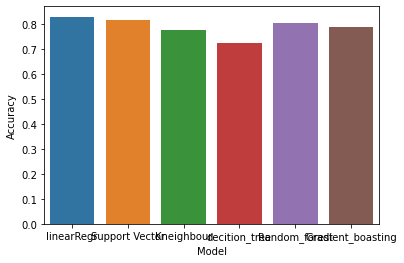

In [119]:
sns.barplot(findf['Model'],findf['Accuracy'])

In [122]:
## fitting whole data in Random forest

rfc_fin=RandomForestClassifier() #making instance of LR

In [124]:
rfc_fin.fit(x2,y2)

RandomForestClassifier()

In [147]:
new_df=pd.DataFrame({
    'age':50 ,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3  
},index=[0])



In [148]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,50,1,0,125,212,0,1,168,0,1.0,2,2,3


In [153]:
result=rfc.predict(new_df);

In [154]:
if(result==0):
    print("No disease")
else:
    print("cancer")

No disease


In [155]:
#saving model

In [156]:
import joblib

In [158]:
joblib.dump(rfc,'model_cancer')

['model_cancer']

In [159]:
model=joblib.load('model_cancer')  ## loading model by importing

In [160]:
model.predict(new_df)

array([0], dtype=int64)

In [161]:
#GUI predictor
from tkinter import *
import joblib

In [167]:
def show():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)
Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show).grid()

mainloop()
